# Исследование объявлений о продаже квартир в Санкт-Петербурге

В нашем распоряжении данные сервиса [Яндекс.Недвижимость](https://realty.ya.ru/sankt-peterburg_i_leningradskaya_oblast/?utm_referrer=https%3A%2F%2Frealty.ya.ru%2Fshowcaptcha%3Fmt%3D01EAD70425A8BCBF0929B86BD3DADED0D324F6558DC9DCCF542BF7A0A6EF8712DB09%26retpath%3DaHR0cHM6Ly9yZWFsdHkueWEucnUvPw%252C%252C_7490177ca1f5809a3f6c0d8695c02986%26t%3D3%2F1678729830%2Ffcd60561a39a2335dccdffd65062578f%26u%3D6ba8981c-e9679991-64c3208b-62265de5%26s%3D13a40faa3f3cc684c4dba0d8dcae86c4) — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Наша задача — установить параметры, влияющие на рыночную стоимость объектов недвижимости. Выводы помогут построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность. 

**Цели исследования:**

1. Изучить параметры объектов недвижимости, в т.ч. их рыночные цены 
2. Установить какие факторы влияют на формирование стоимости объектов недвижимости

**Этапы исследования:**

1. Обзор данных
2. Предобработка данных
3. Проведение анализа параметров 
4. Оценка влияния отдельных параметров на ценообразование 
5. Подведение итогов исследования и разработка рекомендаций


### Обзор данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

#Откроем файл с данными
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

#Изучим основные характеристики датасета
print(data.shape)
print(data.info())

#Посмотрим на первые пять строк
display(data.head())

(23699, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airport

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Описание данных:**

Имеем объемный датасет с 22 столбцами и 23699 строками. 
Типы данных - объектные, булевые, числовые (целые и дробные).

Содержание столбцов:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


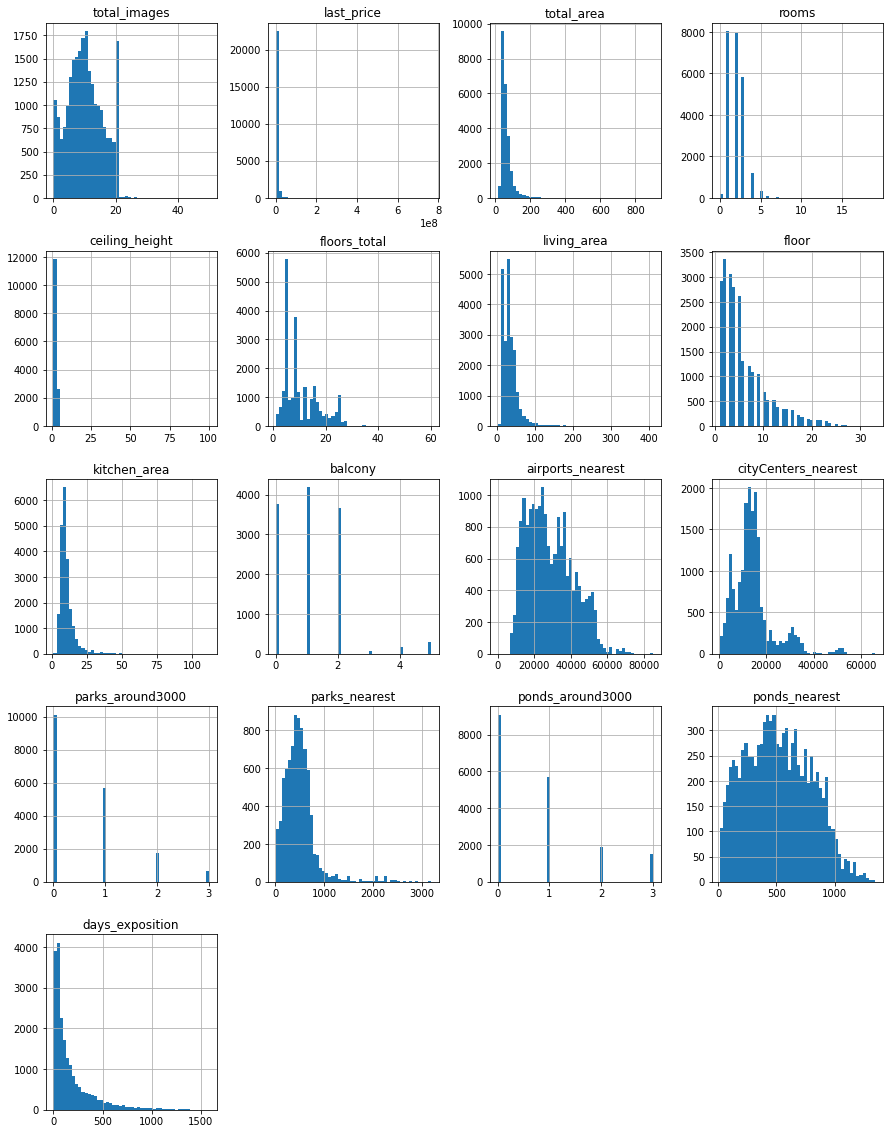

In [2]:
#Построим гистограмму для всех числовых значений
data.hist(figsize=(15, 20), bins=50)                                           
plt.show() 

### Предобработка данных

#### Работа с пустыми значениями

##### Поиск пустых значений по столбцам

In [9]:
#Определим долю пропусков по столбцам
print('Доля пустых значений по столбцам:')
pd.DataFrame(round(data.isna().mean()*100, 2)).sort_values(by=0, ascending=False).style.background_gradient('coolwarm')

Доля пустых значений по столбцам:


,0
is_apartment,88.290000
parks_nearest,65.910000
ponds_nearest,61.560000
balcony,48.610000
ceiling_height,38.800000
airports_nearest,23.380000
cityCenters_nearest,23.290000
ponds_around3000,23.280000
parks_around3000,23.280000
days_exposition,13.420000


Мы имеем дело с данными, вводимыми руками пользователей, поэтому есть большое количество пропусков - в 14 столбцах из 22 имеющихся.

- is_apartment (апартаменты (булев тип))             
- parks_nearest (расстояние до ближайшего парка (м))          
- ponds_nearest (расстояние до ближайшего водоёма (м))         
- balcony (число балконов)                 
- ceiling_height (высота потолков (м))           
- airports_nearest (расстояние до ближайшего аэропорта в метрах (м))         
- cityCenters_nearest (расстояние до центра города (м))      
- ponds_around3000 (число водоёмов в радиусе 3 км (единиц))         
- parks_around3000 (число парков в радиусе 3 км (единиц))         
- days_exposition (сколько дней было размещено объявление (от публикации до снятия)(дней))          
- kitchen_area (площадь кухни в квадратных метрах (м²))            
- living_area (жилая площадь в квадратных метрах (м²))             
- floors_total (всего этажей в доме (единиц))             
- locality_name (название населённого пункта)   

Доля пустот варьируется от 0.21% до 88.29%.

##### Замена пустых значений столбца is_apartment


In [5]:
#Изучим какие данные есть в столбце и как они распределены:
print('Уникальные значения:', data['is_apartment'].unique())
print('Количество пропусков:', data['is_apartment'].isna().sum())
print('Распределение данных: \n', data['is_apartment'].value_counts())

Уникальные значения: [nan False True]
Количество пропусков: 20924
Распределение данных: 
 False    2725
True       50
Name: is_apartment, dtype: int64


В Яндекс.Недвижимость есть разделение на "апартаменты" и "жилой фонд".
Основополагающее различие, согласно самому [источнику](https://realty.ya.ru/journal/post/chto-takoe-apartamenty/#:~:text=%D0%AD%D1%82%D0%BE%20%D1%83%D0%BD%D0%B8%D0%BA%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D1%8B%2C%20%D0%BA%20%D1%82%D0%BE%D0%BC%D1%83,%D0%B2%20%D1%80%D0%B5%D0%BA%D0%BB%D0%B0%D0%BC%D0%B5%2C%20%E2%80%94%20%D1%8D%D1%82%D0%BE%20%D0%B0%D0%BF%D0%B0%D1%80%D1%82%D0%B0%D0%BC%D0%B5%D0%BD%D1%82%D1%8B.&text=%D0%92%D0%BD%D1%83%D1%82%D1%80%D0%B8%20%D0%B0%D0%BF%D0%B0%D1%80%D1%82%D0%B0%D0%BC%D0%B5%D0%BD%D1%82%D1%8B%20%D1%87%D0%B0%D1%81%D1%82%D0%BE%20%D0%B8%D0%BC%D0%B5%D1%8E%D1%82%20%D1%81%D0%B2%D0%BE%D0%B1%D0%BE%D0%B4%D0%BD%D1%83%D1%8E,%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B5%D0%B2%20%D0%BC%D0%BE%D0%B6%D0%BD%D0%BE%20%D1%81%D0%B4%D0%B5%D0%BB%D0%B0%D1%82%D1%8C%20%D0%BB%D1%8E%D0%B1%D1%83%D1%8E%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BF%D0%BB%D0%B0%D0%BD%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D1%83.), в следующем:

_"Главное, что нужно знать об апартаментах: это нежилые с юридической точки зрения помещения. В документах они могут значиться как здания гостиничного типа или объекты общественно-делового значения. То есть вы, конечно, сможете в них жить, но получить постоянную прописку в апартаментах нельзя."_

Сейчас по состоянию на 15.11.2022 доля апартаментов в Санкт-Петербурге и Ленинской области составляет менее 5%. Вклад данной характеритики имеет небольшой вес, в проекте данный параметр в дальнейшем не рассматривается, поэтому можно считать, что **пропущенные значения в этом столбце означают False**.

In [6]:
#Заменим пустые значения столбца is_apartment на False
data['is_apartment'] = data['is_apartment'].fillna(False)
#Проверим успешность заполнения
print('Количество пропусков:', data['is_apartment'].isna().sum())

Количество пропусков: 0


##### Замена пустых значений столбцов, связанных с расположением недвижимости: parks_nearest, ponds_nearest, airports_nearest, cityCenters_nearest, ponds_around3000, parks_around3000

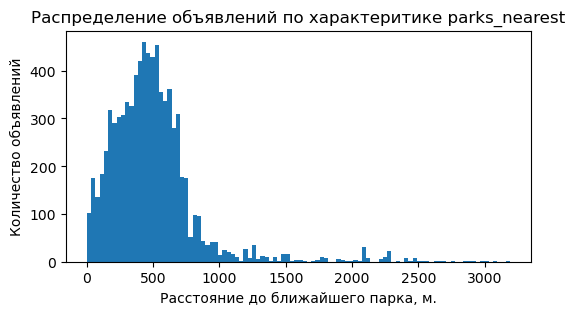

In [12]:
#Изучим как распределены данные в столбце parks_nearest
fig, ax = plt.subplots(figsize=(6,3))
ax.hist(data['parks_nearest'], bins = 100)
ax.set_title('Распределение объявлений по характеритике parks_nearest')
ax.set_xlabel('Расстояние до ближайшего парка, м.')
ax.set_ylabel('Количество объявлений')
plt.show()

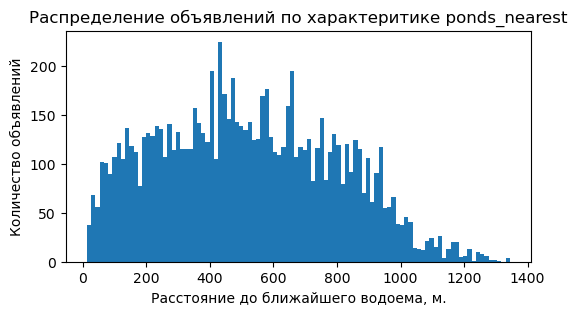

In [13]:
#Изучим как распределены данные в столбце ponds_nearest
fig, ax = plt.subplots(figsize=(6,3))
ax.hist(data['ponds_nearest'], bins = 100)
ax.set_title('Распределение объявлений по характеритике ponds_nearest')
ax.set_xlabel('Расстояние до ближайшего водоема, м.')
ax.set_ylabel('Количество объявлений')
plt.show()

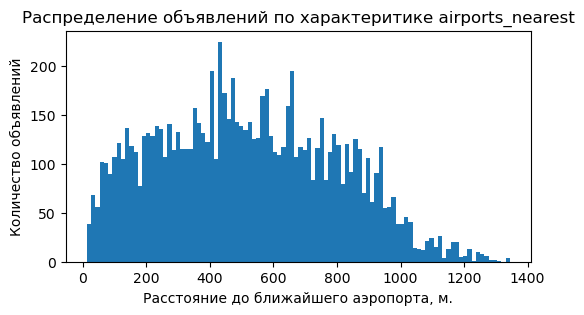

In [14]:
#Изучим как распределены данные в столбце airports_nearest
fig, ax = plt.subplots(figsize=(6,3))
ax.hist(data['ponds_nearest'], bins = 100)
ax.set_title('Распределение объявлений по характеритике airports_nearest')
ax.set_xlabel('Расстояние до ближайшего аэропорта, м.')
ax.set_ylabel('Количество объявлений')
plt.show()

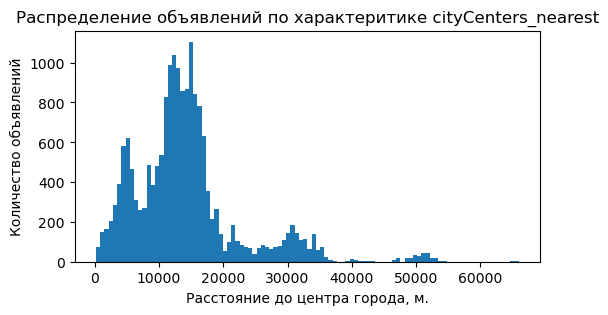

In [15]:
#Изучим как распределены данные в столбце cityCenters_nearest:
fig, ax = plt.subplots(figsize=(6,3))
ax.hist(data['cityCenters_nearest'], bins = 100)
ax.set_title('Распределение объявлений по характеритике cityCenters_nearest')
ax.set_xlabel('Расстояние до центра города, м.')
ax.set_ylabel('Количество объявлений')
plt.show()

In [11]:
#Изучим как распределены данные в столбце parks_around3000 (число парков в радиусе 3 км)
print('Распределение данных: \n', data['parks_around3000'].value_counts())

Распределение данных: 
 0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64


In [12]:
#Изучим как распределены данные в столбце ponds_around3000 (число водоемов в радиусе 3 км)
print('Распределение данных: \n', data['ponds_around3000'].value_counts())

Распределение данных: 
 0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64


На [странице создания объявления Яндекс.Недвижимость](https://realty.ya.ru/management-new/add/) по состоянию на 15.11.2022 не требуется ручной ввод  параметров,  связанных с расположением недвижимости от парков, водоемов, аэропортов, центра города, а также количества парков и водоемов рядом. Однако, на [странице поиска](https://realty.ya.ru/sankt-peterburg_i_leningradskaya_oblast/kupit/kvartira/) пользователь может отфильтровать поиск по этим параметрам. Платформа сама определяет нужные расстояния и число парков/водоемов по карте согласно картографическим данным. Поэтому причина пропуска значений может нести технический характер (ошибка при вводе или распознавании адреса, при выгрузке данных и т.п.). Т.к. в датасете нет столбца с точным адресом, мы не можем предположить какие значения было бы корректно внести вместо пропусков. Поэтому принято решение **в этих столбцах пропуски оставить как есть**.

##### Замена пустых значений столбца balcony

In [13]:
#Изучим какие данные есть в столбце balcony и как они распределены:
print('Уникальные значения:', data['balcony'].unique())
print('Количество пропусков:', data['balcony'].isna().sum())
print('Распределение данных: \n', data['balcony'].value_counts())

Уникальные значения: [nan  2.  0.  1.  5.  4.  3.]
Количество пропусков: 11519
Распределение данных: 
 1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


В Яндекс.Недвижимость по состоянию на 15.11.2022 ввод числа балконов не является обязательным. С высокой долей вероятности пользователи пропускали ввод значения ввиду отсутствия балкона. Поэтому принимаем решение заменить **пропущенные значения на 0**.

In [14]:
#Заменим пустые значенияв столбце balcony на 0
data['balcony'] = data['balcony'].fillna(0)
#Проверим успешность заполнения
print('Количество пропусков:', data['balcony'].isna().sum())

Количество пропусков: 0


##### Замена пустых значений столбца days_exposition 

In [17]:
#Изучим какие данные есть в столбце days_exposition и как они распределены:
print('Уникальные значения:', data['days_exposition'].unique())
print('Количество пропусков:', data['days_exposition'].isna().sum())
print('Распределение данных: \n', data['days_exposition'].value_counts())
print('Основные статистические данные: \n', data['days_exposition'].describe())

Уникальные значения: [  nan   81.  558. ... 1360. 1007.  971.]
Количество пропусков: 3181
Распределение данных: 
 45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1021.0      1
1362.0      1
1105.0      1
795.0       1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64
Основные статистические данные: 
 count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


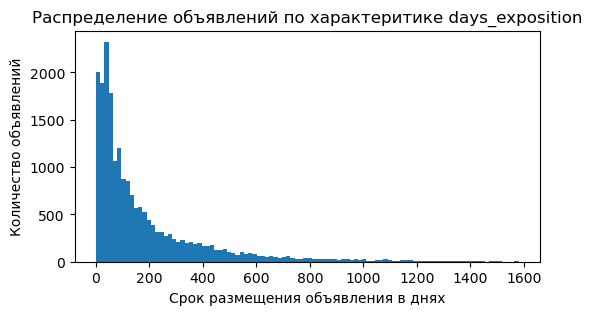

In [16]:
fig, ax = plt.subplots(figsize=(6,3))
ax.hist(data['days_exposition'], bins = 100)
ax.set_title('Распределение объявлений по характеритике days_exposition')
ax.set_xlabel('Срок размещения объявления в днях')
ax.set_ylabel('Количество объявлений')
plt.show()

Этот параметр показывает, сколько дней было размещено каждое объявление. Минимальное значение равно единице.
Предположительно отсутствие данных означает, что между датой публикации и датой ее снятия не прошло ни одного дня, т.е. пользователи могли опубликовать объявление и сразу его удалить в тот же день (из-за ошибки, отмены продажи и т.д.).
Поэтому принимаем решение заменить **пропущенные значения на 0**.

In [16]:
#Заменим пустые значения в столбце days_exposition на 0
data['days_exposition'] = data['days_exposition'].fillna(0)
#Проверим успешность заполнения
print('Количество пропусков:', data['days_exposition'].isna().sum())

Количество пропусков: 0


##### Замена пустых значений столбца ceiling_height

In [17]:
#Изучим какие данные есть в столбце ceiling_height и как они распределены:
print('Уникальные значения:', data['ceiling_height'].unique())
print('Количество пропусков:', data['ceiling_height'].isna().sum())
print('Распределение данных: \n', data['ceiling_height'].value_counts())
print('Основные статистические данные: \n', data['ceiling_height'].describe())

Уникальные значения: [  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.

По данным можно понять, что они вводились пользователями вручную, а окно ввода не имело функции проверки вводимой величины.
Причиной пропусков в данном столбце скорее всего является человеческий фактор - например, пользователь мог на момент публикации объявления не знать точной высоты потолков и пропустить пункт.
В датасете нет характеристик зданий (например, сталинка, КПД, монолитно-каркасный дом, пентхаус и т.д.), поэтому сделать вывод о стандартной высоте потолков по категориям невозможно.
В данном случае **можно заполнить пустоты медианным значением**.

In [18]:
#Заменим пустые значения на медиану
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#Проверим успешность заполнения
print('Количество пропусков:', data['ceiling_height'].isna().sum())

Количество пропусков: 0


##### Замена пустых значений столбцов, связанных с распределением площади: kitchen_area, living_area

Уникальные значения площади кухни: [ 25.    11.     8.3     nan  41.     9.1   14.4   18.9    8.81   6.5
   8.5    6.     9.     5.2    8.     7.6    5.6   12.     5.7    6.1
  19.6   15.     7.     9.2   11.7   13.4   17.     6.3   11.6    8.8
  10.    17.6    7.5    9.5   50.    15.5   10.7   11.1   20.    11.9
  16.     5.3   11.5    7.2    6.2   10.4    7.1    4.9    7.3   11.95
  10.2    6.4    5.5   13.     8.4   23.6   10.8   18.3    5.     8.2
  24.    23.8    6.6   26.85  15.4    7.8   33.8    5.4   12.72  12.2
  19.    12.4    7.9   10.3    9.8   17.5   14.7   20.91  21.3   10.6
  10.9    9.7    7.7   12.5   11.4    8.6   11.24  14.1   15.7   13.29
  14.    12.9   12.7   16.5    9.36  21.5   35.    10.5    8.7   19.3
  21.4   40.    49.2   11.52   8.9    9.6   30.    14.2    8.1   10.44
   4.5   16.3   11.2   18.4    7.4   11.3    9.4   13.1   10.19   7.06
  22.    36.     5.1   18.7    9.9   14.3   18.    23.    19.4   11.8
  13.3   17.7   23.1   10.63  21.1   11.33  13.5   

<AxesSubplot:>

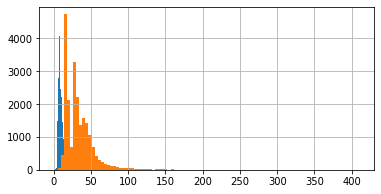

In [19]:
#Изучим какие данные есть в столбце и как они распределены:

print('Уникальные значения площади кухни:', data['kitchen_area'].unique())
print('Количество пропусков площади кухни:', data['kitchen_area'].isna().sum())
print('Распределение данных площади кухни: \n', data['kitchen_area'].value_counts())
print('Основные статистические данные площади кухни: \n', data['kitchen_area'].describe())
data['kitchen_area'].hist(bins=100, figsize=(6,3))

print('Уникальные значения площади жилой зоны:', data['living_area'].unique())
print('Количество пропусков площади жилой зоны:', data['living_area'].isna().sum())
print('Распределение данных площади жилой зоны: \n', data['living_area'].value_counts())
print('Основные статистические данные площади жилой зоны: \n', data['living_area'].describe())
data['living_area'].hist(bins=100, figsize=(6,3))


Как и в предыдущем пункте причиной пропусков является человеческий фактор - пользователи могли не знать точных размеров площади пропустить пункт, либо в недвижимости нет четко ограниченной зоны кухни и жилой зоны (например, в квартирах-студиях, квартирах с открытой планировкой).
Наиболее влиятельной харакетристикой на площадь кухни и жилой зоны является количество комнат.
В данном случае **можно заполнить пустоты медианой по количеству комнат**.

In [20]:
#Изучим как распределены значения в столбце с количеством комнат
print(data['rooms'].value_counts())

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


In [21]:
#Заполним пропуски в столбцах kitchen_area, living_area произведением их медианной доли от общей площади
#Медианную долю выведем отдельно для каждого сегмента квартир по количеству комнат 
  
for a in data['rooms'].unique():
    data.loc[(data['rooms'] == a) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == a) & (data['kitchen_area'].isna()), 'total_area'] * \
    ((data.loc[(data['rooms'] == a), 'kitchen_area']/data.loc[(data['rooms'] == a), 'total_area']).median())

for b in data['rooms'].unique():
    data.loc[(data['rooms'] == b) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == b) & (data['living_area'].isna()), 'total_area'] * \
    ((data.loc[(data['rooms'] == b), 'living_area']/data.loc[(data['rooms'] == b), 'total_area']).median())
    
#Проверим успешность заполнения
print('Количество пропусков площади кухни:', data['kitchen_area'].isna().sum())
print('Количество пропусков площади жилой зоны:', data['living_area'].isna().sum())

Количество пропусков площади кухни: 197
Количество пропусков площади жилой зоны: 0


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [22]:
#Посмотрим в каких типах квартир остались пропуски площади кухни

#Количество комнат
print(data.loc[(data['kitchen_area'].isna()),'rooms'].value_counts())

#Явлется ли студией
print(data.loc[(data['kitchen_area'].isna()),'studio'].value_counts())

0    197
Name: rooms, dtype: int64
True     138
False     59
Name: studio, dtype: int64


Пропуски остались во всех квартирах, в которых в столбце с количеством комнат был указан 0. При этом не все они являются квартирами-студиями (что странно).
В данном случае предположить площадь кухни и жилой зоны нельзя, т.к. нет четко ограниченной зоны кухни и жилой зоны, поэтому **эти значения оставим пустыми**. 

##### Замена пустых значений столбцa floors_total

Уникальные значения: [16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]
Количество пропусков: 86


<AxesSubplot:>

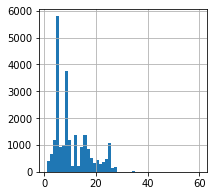

In [23]:
#Изучим какие данные есть в столбце и как они распределены:

print('Уникальные значения:', data['floors_total'].unique())
print('Количество пропусков:', data['floors_total'].isna().sum())
data['floors_total'].hist(bins=50, figsize=(3,3))

Параметр показывает сколько всего этажей в здании, в котором находится недвижимость. Возможно этаж не указывают в случае если недвижимость является отдельно стоящим малоэтажным зданием, тогда можно было бы приравнять пустые значения столбца floors_total на значения столбца floor. Проверим, что указано в столбце floor в объявлениях, в которых floors_total пропущен. 

In [24]:
#Посмотрим на распредение данных в столбце floor в объявлениях, в которых floors_total пропущен.
print(data.loc[(data['floors_total'].isna()),'floor'].value_counts())

4     10
6      9
8      8
12     6
9      5
3      4
5      4
7      4
21     4
15     3
19     3
18     3
1      3
13     3
11     3
10     3
14     2
2      2
20     2
24     2
17     1
22     1
23     1
Name: floor, dtype: int64


Пропуски в столбце floors_total есть даже в случаях, когда недвижимость находится в многоэтажных жилых домах. Логично предположить, что пользователи просто пропускали окно ввода по невнимательности.
В данном случае невозможно предположить этажность здания, поэтому **эти значения оставим пустыми**.

##### Замена пустых значений столбцa locality_name              

In [25]:
#Изучим какие данные есть в столбце и как они распределены:

print('Уникальные значения:', data['locality_name'].unique())
print('Количество пропусков:', data['locality_name'].isna().sum())
print('Распределение данных: \n', data['locality_name'].value_counts())

Уникальные значения: ['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бо

На [странице создания объявления Яндекс.Недвижимость](https://realty.ya.ru/management-new/add/) по состоянию на 15.11.2022 ввод точного адреса обязателен. Адрес сразу находится на карте, платформа сама определяет название населённого пункта. Причина пропуска значений скорее всего имеет технический характер (ошибка при вводе или распознавании адреса, при выгрузке данных и т.п.). Т.к. в датасете нет столбца с точным адресом, мы не можем предположить какие населенные пункты можно ввести вместо пропусков. Поэтому принято решение **в этих столбцах пропуски оставить**.

##### Результаты заполнения пустых значений

In [26]:
#Определим в каких столбцах остались пропуски и их долю
print(data.isna().sum().sort_values(ascending=False))
print('Доля пустых значений от всего датасета после их обработки составляет', (data.isna().sum()).sum()/data['total_images'].sum())

parks_nearest           15620
ponds_nearest           14589
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
kitchen_area              197
floors_total               86
locality_name              49
total_images                0
balcony                     0
open_plan                   0
last_price                  0
studio                      0
is_apartment                0
floor                       0
living_area                 0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
days_exposition             0
dtype: int64
Доля пустых значений от всего датасета после их обработки составляет 0.22529918334503243


По итогу заполнения пустых значений там, где это было возможно, **доля пустых значений уменьшилась с 43.4% до 22.5%** (на 20,9 п.п.)

#### Изменение типов данных

In [27]:
#Еще раз посмотрим какие типы данных есть в столбцах
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23502 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Тип данных float можно заменить на int в следующих столбцах, не имеющих пустых значений:
- last_price - цена на момент снятия с публикации - указывается в рублях без копеек, дробную часть можно убрать       
- balcony - число балконов - указывается в шт., должны быть целые числа  
- days_exposition - сколько дней было размещено объявление (от публикации до снятия) - указывается в днях, должны быть целые числа                      

Замена float на int облегчит датасет и ускорит время анализа данных.

Кстати, при сравнении с аналогичной таблице в п.1 видно, что тип данных в столюце is_apartment изменился на bool после заполнения пустот.

In [28]:
#В столбцах last_price, balcony и days_exposition изменим типы данных на int 
data['balcony'] = data['balcony'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)
#В столбце last_price переведем единицу измерения из руб. в тыс. руб. изменим типы данных на int
data['last_price'] = data['last_price']/1000
data['last_price'] = data['last_price'].astype(int)

In [29]:
#Проверим успешность замены типов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23502 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [30]:
#округлим значения площади кухни и жилой зоны до сотых
data['kitchen_area'] = round(data['kitchen_area'],2)
data['living_area'] = round(data['living_area'],2)

#### Удаление дубликатов

In [31]:
#Посчитаем количество явных дубликатов
data.duplicated().sum()

0

Явных дубликатов в датасете нет, но могут быть неявные дубликаты в нечисловых данных (столбцы locality_name, first_day_exposition).
Проверим их наличие в столбце locality_name (название населенного пункта).          

In [32]:
#Посмотрим на уникальные значения в столбце locality_name и их количество
print(data['locality_name'].unique())
print(data['locality_name'].nunique())


['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Столбец содержит 364 уникальных значений.
Для удаления дубликатов можно бы было удалить тип населенного пункта. Но в Ленинградской области среди [населенных пунктов](https://ru.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D1%91%D0%BD%D0%BD%D1%8B%D0%B5_%D0%BF%D1%83%D0%BD%D0%BA%D1%82%D1%8B_%D0%9B%D0%B5%D0%BD%D0%B8%D0%BD%D0%B3%D1%80%D0%B0%D0%B4%D1%81%D0%BA%D0%BE%D0%B9_%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D0%B8) есть повторы, например ниже список разных населенных пунктов с одинаковым названием:

- город Никольское
- городской поселок Никольский
- село Никольское
- деревня Никольское 

Поэтому убирать тип населенного пункта будет некорректно. Заменим "ё" на "е", а далее "поселок городского типа", "поселок станции", "городской поселок", "коттеджный поселок" на "поселок".

In [33]:
#Заменим "ё" на "е" 
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [34]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')

In [35]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')

In [36]:
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок','поселок')

In [37]:
data['locality_name'] = data['locality_name'].str.replace('поселок станции','поселок')

In [38]:
data['locality_name'] = data['locality_name'].str.replace('поселок имени','поселок')

In [39]:
#Посмотрим на уникальные значения в столбце и их количество после замены значений
print(data['locality_name'].unique())
print(data['locality_name'].value_counts())

['Санкт-Петербург' 'поселок Шушары' 'поселок Янино-1' 'поселок Парголово'
 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'деревня Кудрово' 'Коммунар' 'Колпино' 'поселок Красный Бор' 'Гатчина'
 'деревня Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'поселок Металлострой' 'поселок Лебяжье'
 'поселок Сиверский' 'поселок Молодцово' 'поселок Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'поселок Бугры' 'поселок Рощино' 'Кириши'
 'Луга' 'Волосово'

Количество уникальных значений сократилось от 364 до 320, заменой значений удалось избавиться от 44 неявных дубликатов в столбце locality_name.
Теперь проверим наличие неявных дубликатов в столбце first_day_exposition 

In [40]:
#Посмотрим на уникальные значения в столбце и их количество
print(data['first_day_exposition'].unique())
print(data['first_day_exposition'].value_counts())

['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']
2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2015-09-08T00:00:00      1
2015-06-20T00:00:00      1
2015-02-14T00:00:00      1
2015-09-02T00:00:00      1
2015-11-16T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64


Значение даты записано единым форматов во всех строках, неявных дубликатов в столбце first_day_exposition нет.

In [41]:
#Посмотрим увеличилось ли количество явных дубликатов в датасете после сокращения неявных дубликатов в столбце locality_name
data.duplicated().sum()

0

Явных дубликатов в датасете не появилось.

#### Работа с аномальными значениями

Рассмотрим значения в столбцах, которые имели аномальные выбросы согласно гистограммам в пункте 1 проекта: 
- ceiling_height — высота потолков (м)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- living_area — жилая площадь в квадратных метрах (м²)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации

##### Анализ выбросов столбца ceiling_height

На гистограмме было видно, что есть значения от 1 м. до 100 м. Еще раз посмотрим на уникальные значения в столце.

In [42]:
print('Уникальные значения по возрастанию: \n', sorted(data['ceiling_height'].unique()))

Уникальные значения по возрастанию: 
 [1.0, 1.2, 1.75, 2.0, 2.2, 2.25, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3

По СНиП потолки в жилых зданиях не должны быть ниже 2,5 метров. Но в Яндекс.Недвижимость есть не только жилые здания, например, апартаменты имеют иной юрилический статус. Поэтому для анализа возьмем минимальную планку 2 метра. Максимальное значение не ограничено, но можем предположить, что в нестандартной недвижимости (лофт, пентхаус, 2-3 уровневые) высота потолков может достигать 10 метров.

Значения выше 10 метров скорее всего указаны без запятой (например, 25 м. это 2.5 м.), поэтому разделим их на 10. 
Затем удалим значения, которые находятся ниже  планки 2 метров.

In [43]:
#значения выше 10 метров разделим на 10
data.loc[data['ceiling_height'] > 10, 'ceiling_height']=data.loc[data['ceiling_height'] > 10, 'ceiling_height']/10

In [44]:
#удалим строки, где высота потолков ниже 2 метров
data = data.drop(data[data['ceiling_height'] < 2].index)

In [45]:
#проверим оставшиеся уникальные значения
print('Уникальные значения по возрастанию: \n', sorted(data['ceiling_height'].unique()))

Уникальные значения по возрастанию: 
 [2.0, 2.2, 2.25, 2.2600000000000002, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2,

<AxesSubplot:>

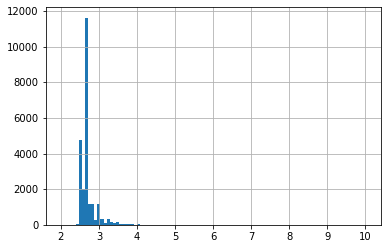

In [46]:
#выведем гистограмму с распределением значений
data['ceiling_height'].hist(bins=100)

##### Анализ выбросов столбцов total_area, kitchen_area, living_area

На гистограммах было видно, что есть значения крайне больших площадей. Посмотрим на уникальные значения в столбцах и распределение на графике.
Посчитаем долю выбросов и удалим их при их значении менее 5%.

In [47]:
print('Уникальные значения общей площади  по возрастанию: \n', sorted(data['total_area'].unique()))

Уникальные значения общей площади  по возрастанию: 
 [12.0, 13.0, 13.2, 14.0, 15.0, 15.5, 16.0, 17.0, 17.2, 17.6, 17.78, 18.0, 18.4, 18.5, 18.8, 18.9, 19.0, 19.5, 20.0, 20.1, 20.3, 20.5, 20.6, 20.67, 20.8, 21.0, 21.1, 21.3, 21.4, 21.57, 21.6, 21.7, 21.8, 21.89, 21.9, 22.0, 22.2, 22.23, 22.3, 22.4, 22.5, 22.7, 23.0, 23.06, 23.17, 23.29, 23.3, 23.39, 23.4, 23.5, 23.55, 23.6, 23.69, 23.7, 23.8, 23.98, 24.0, 24.05, 24.1, 24.2, 24.26, 24.3, 24.4, 24.42, 24.5, 24.6, 24.62, 24.64, 24.67, 24.7, 24.75, 24.8, 24.9, 25.0, 25.07, 25.15, 25.2, 25.27, 25.3, 25.33, 25.36, 25.4, 25.41, 25.48, 25.5, 25.53, 25.55, 25.6, 25.63, 25.7, 25.8, 25.9, 26.0, 26.05, 26.09, 26.1, 26.18, 26.2, 26.23, 26.4, 26.45, 26.49, 26.5, 26.6, 26.69, 26.7, 26.8, 26.9, 27.0, 27.1, 27.11, 27.2, 27.3, 27.32, 27.36, 27.4, 27.5, 27.55, 27.56, 27.6, 27.7, 27.8, 27.81, 27.9, 28.0, 28.01, 28.05, 28.1, 28.16, 28.2, 28.3, 28.4, 28.49, 28.5, 28.6, 28.61, 28.66, 28.7, 28.71, 28.8, 28.86, 28.9, 29.0, 29.1, 29.14, 29.2, 29.24, 29.3, 29.4, 

<AxesSubplot:>

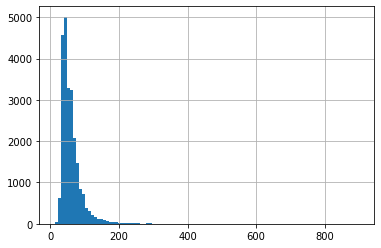

In [48]:
data['total_area'].hist(bins=100)

(0.0, 130.0)

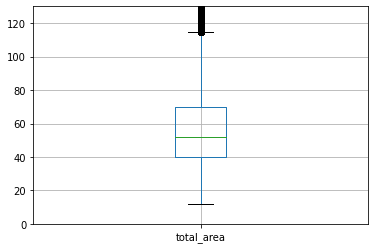

In [49]:
data.boxplot('total_area')
plt.ylim(0, 130)

По гистограмме видно, что после 200 кв.м. данных становится совсем мало, скорее всего они относятся к частному сектору. [Средняя площадь частного дома в России в 2022 году оставила 145 кв.м.](https://ruinformer.com/page/srednjaja-ploshhad-chastnogo-doma-v-rossii-vyrosla-na-14-kvadratnyh-metrov) Допустим, что в Санкт-Петербурге и ЛО эта площадь больше с учетом недвижимости премиум сегмента, возьмем максимальную планку в 250 кв.м., оценим их долю и удалим из датасета. 

In [50]:
print('Доля выбросов более 300 кв.м. по столбцу total_area:', (data.loc[data['total_area']>250,'total_area'].count())/(data['total_area'].count()))

Доля выбросов более 300 кв.м. по столбцу total_area: 0.004726935089052081


In [51]:
#удалим строки с выбросами
data = data.drop(data[data['total_area'] > 250].index)

<AxesSubplot:>

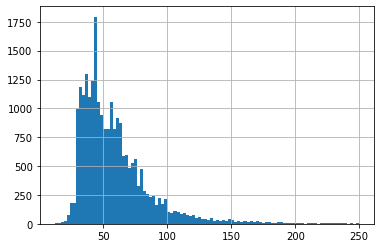

In [52]:
#проверим гистрограмму
data['total_area'].hist(bins=100)

In [53]:
print('Уникальные значения площади кухни  по возрастанию: \n', sorted(data['kitchen_area'].unique()))        

Уникальные значения площади кухни  по возрастанию: 
 [1.3, 3.0, 3.2, 3.8, 4.0, 4.2, 4.46, 4.5, 4.7, 4.8, 4.9, 4.98, 5.0, 5.1, 5.2, 5.3, 5.34, 5.4, 5.43, 5.45, 5.47, 5.5, 5.58, 5.6, 5.61, 5.62, 5.68, 5.7, 5.74, 5.78, 5.84, 5.94, 5.96, 6.0, 6.02, 6.04, 6.05, 6.1, 6.2, 6.25, 6.3, 6.32, 6.35, 6.4, 6.43, 6.49, 6.5, 6.55, 6.56, 6.58, 6.59, 6.6, 6.65, 6.69, 6.72, 6.73, 6.76, 6.85, 6.89, 6.93, 6.96, 6.97, 7.0, 7.01, 7.06, 7.09, 7.1, 7.11, 7.12, 7.15, 7.16, 7.17, 7.18, 7.2, 7.23, 7.3, 7.38, 7.4, 7.41, 7.44, 7.5, 7.53, 7.57, 7.6, 7.68, 7.7, 7.71, 7.73, 7.78, 7.8, 7.81, 7.83, 7.85, 7.89, 7.9, 7.91, 7.92, 7.93, 8.0, 8.02, 8.03, 8.05, 8.08, 8.1, 8.11, 8.13, 8.2, 8.21, 8.23, 8.25, 8.26, 8.3, 8.32, 8.39, 8.4, 8.43, 8.47, 8.49, 8.5, 8.52, 8.53, 8.54, 8.55, 8.6, 8.61, 8.64, 8.65, 8.67, 8.68, 8.69, 8.7, 8.73, 8.74, 8.76, 8.79, 8.8, 8.81, 8.89, 8.9, 8.99, 9.0, 9.02, 9.04, 9.05, 9.08, 9.1, 9.15, 9.17, 9.2, 9.22, 9.24, 9.25, 9.27, 9.29, 9.32, 9.33, 9.36, 9.38, 9.39, 9.4, 9.42, 9.43, 9.44, 9.46, 9.47, 9.49,

<AxesSubplot:>

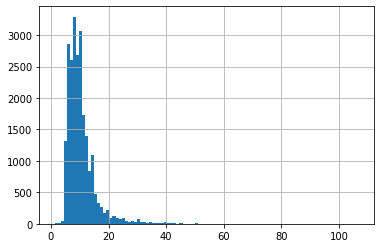

In [54]:
data['kitchen_area'].hist(bins=100)

<AxesSubplot:>

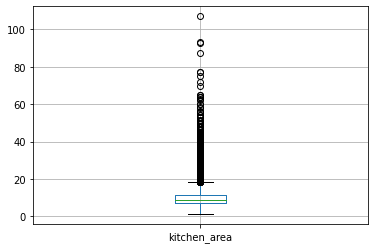

In [55]:
data.boxplot('kitchen_area')

 Возьмем максимальную планку по площади кухни 40 кв.м., оценим долю выбросов и удалим из датасета.

In [56]:
print('Доля выбросов более 300 кв.м. по столбцу kitchen_area:', (data.loc[data['kitchen_area']>40,'kitchen_area'].count())/(data['kitchen_area'].count()))

Доля выбросов более 300 кв.м. по столбцу kitchen_area: 0.004532626357649876


In [57]:
#удалим строки с выбросами
data = data.drop(data[data['kitchen_area'] > 40].index)

<AxesSubplot:>

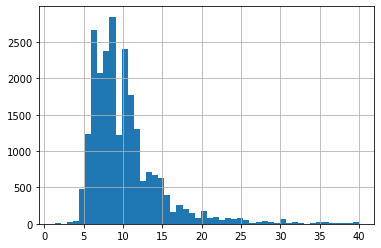

In [58]:
#проверим гистрограмму
data['kitchen_area'].hist(bins=50)

In [59]:
print('Уникальные значения площади жилой зоны  по возрастанию: \n', sorted(data['living_area'].unique())) 

Уникальные значения площади жилой зоны  по возрастанию: 
 [2.0, 3.0, 5.0, 5.4, 6.0, 6.27, 6.37, 6.5, 7.24, 8.0, 8.3, 8.5, 8.68, 8.9, 8.93, 9.0, 9.1, 9.65, 9.7, 9.8, 10.0, 10.08, 10.3, 10.4, 10.5, 10.52, 10.55, 10.6, 10.61, 10.7, 10.76, 10.8, 10.86, 10.9, 10.93, 10.94, 11.0, 11.1, 11.15, 11.18, 11.2, 11.3, 11.38, 11.4, 11.47, 11.5, 11.57, 11.58, 11.6, 11.7, 11.77, 11.79, 11.88, 11.9, 11.92, 11.99, 12.0, 12.06, 12.08, 12.1, 12.13, 12.18, 12.2, 12.28, 12.3, 12.32, 12.5, 12.54, 12.6, 12.7, 12.71, 12.79, 12.8, 12.81, 12.9, 12.98, 13.0, 13.03, 13.05, 13.09, 13.1, 13.15, 13.2, 13.27, 13.3, 13.32, 13.34, 13.37, 13.4, 13.46, 13.5, 13.51, 13.54, 13.56, 13.59, 13.6, 13.62, 13.66, 13.7, 13.73, 13.75, 13.76, 13.79, 13.8, 13.82, 13.85, 13.89, 13.9, 13.92, 13.99, 14.0, 14.01, 14.02, 14.03, 14.04, 14.06, 14.08, 14.1, 14.11, 14.14, 14.16, 14.17, 14.19, 14.2, 14.22, 14.23, 14.25, 14.28, 14.3, 14.31, 14.35, 14.37, 14.38, 14.39, 14.4, 14.41, 14.45, 14.46, 14.47, 14.5, 14.51, 14.52, 14.55, 14.56, 14.57, 14

<AxesSubplot:>

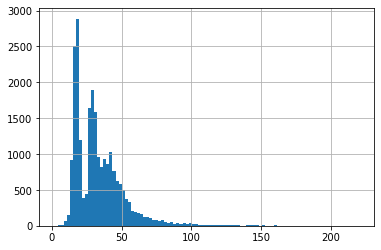

In [60]:
data['living_area'].hist(bins=100)

<AxesSubplot:>

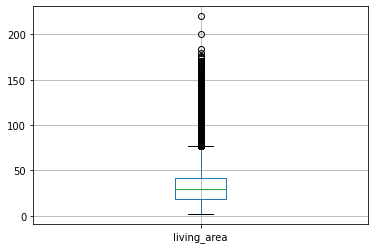

In [61]:
data.boxplot('living_area')

Возьмем максимальную планку по площади жилой зоны 120 кв.м., оценим долю выбросов и удалим из датасета.

In [62]:
print('Доля выбросов более 150 кв.м. по столбцу living_area:', (data.loc[data['living_area']>120,'living_area'].count())/(data['living_area'].count()))

Доля выбросов более 150 кв.м. по столбцу living_area: 0.006176520701993525


In [63]:
#удалим строки с выбросами
data = data.drop(data[data['living_area'] > 120].index)

<AxesSubplot:>

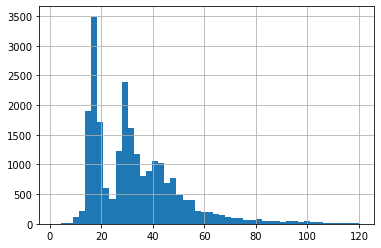

In [64]:
#проверим гистрограмму
data['living_area'].hist(bins=50)

##### Анализ выбросов столбца last_price 

In [65]:
print('Уникальные значения цены  по возрастанию: \n', sorted(data['last_price'].unique()))

Уникальные значения цены  по возрастанию: 
 [430, 440, 450, 470, 480, 490, 500, 520, 530, 550, 560, 565, 580, 585, 590, 600, 620, 630, 650, 660, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 777, 780, 790, 799, 800, 820, 850, 860, 869, 870, 880, 890, 900, 910, 920, 945, 950, 965, 970, 980, 990, 995, 999, 1000, 1010, 1020, 1030, 1050, 1060, 1070, 1080, 1090, 1099, 1100, 1110, 1130, 1150, 1170, 1180, 1190, 1199, 1200, 1220, 1230, 1240, 1249, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1315, 1320, 1330, 1350, 1353, 1360, 1370, 1380, 1390, 1399, 1400, 1420, 1430, 1440, 1449, 1450, 1470, 1480, 1490, 1495, 1499, 1500, 1510, 1540, 1550, 1555, 1560, 1570, 1580, 1590, 1599, 1600, 1625, 1630, 1634, 1640, 1650, 1670, 1671, 1678, 1680, 1686, 1690, 1700, 1704, 1718, 1720, 1730, 1737, 1740, 1748, 1750, 1760, 1770, 1780, 1790, 1799, 1800, 1810, 1811, 1820, 1830, 1840, 1846, 1850, 1860, 1870, 1880, 1888, 1890, 1897, 1899, 1900, 1920, 1930, 1935, 1938, 1940, 1945, 1950, 1960, 1961, 1968, 1970, 1980, 

<AxesSubplot:>

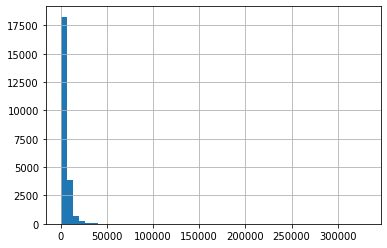

In [66]:
data['last_price'].hist(bins=50)

По гистограмме видно, что после 50 млн руб. данных мало. Возьмем максимальную планку в 40 млн. руб., оценим долю и удалим из датасета. 

In [67]:
print('Доля выбросов более 150 кв.м. по столбцу last_price:', (data.loc[data['last_price']>40000,'last_price'].count())/(data['last_price'].count()))

Доля выбросов более 150 кв.м. по столбцу last_price: 0.003000300030003


In [68]:
#удалим строки с выбросами
data = data.drop(data[data['last_price'] > 40000].index)

<AxesSubplot:>

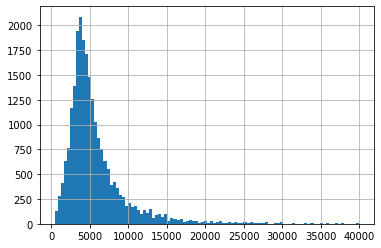

In [69]:
data['last_price'].hist(bins=100)

##### Результаты сокращения аномальных значений

In [70]:
#Определим на сколько сократился датасет после удаления аномальных выбросов
print(1-data['total_images'].count()/23699)

0.01848179248069537


В ходе анализа выявлены аномальные значения в столбцах ceiling_height, total_area, kitchen_area, living_area. 

Аномалии ceiling_height были частично преобразованы. т.к. предположительно пользователи неверно вводили данные (например, 26 м. вместо 2.6 м.). Часть же непреобразуемых данных была удалена.

В столбцах, связанных с площадью недвижимости (total_area, kitchen_area, living_area) выбивающиеся редкие значения были удалены. 

**В итоге сокращения аномалий, датасет стал меньше на 1.8 %**.



##### Результаты предобработки данных

На входе мы имели архив с данными Яндекс.Недвижимость в Санкт-Петербурге и ЛО за 2014-2019 гг., вводимыми руками пользователей, т.е. с большим количеством пропусков и аномалий. Нам необходимо было привести датасет в подобающий для последующего анализа вид.Так, в нашу таблицу внесены следующие корретировки :

- По итогу заполнения пустых значений там, где это было возможно, доля пустот уменьшилась с 43.4% до 22.5% (на 20,9 п.п.).
- В результате сокращения аномальных значений датасет стал меньше на 1.8 %.
- Заменой значений удалось избавиться от 44 неявных дубликатов.

### Добавление в таблицу новых столбцов

#### Цена одного квадратного метра

Цена за один квадратный метр определяется как отношение цены недвижимости на ее общую площадь.

In [71]:
#Добавим столбец sqm_price
data['sqm_price'] = data['last_price']/data['total_area']

In [72]:
#Проверим успешность включения столбца sqm_price
print(data['sqm_price'].describe())

count    23261.000000
mean        96.974657
std         38.214690
min          7.962963
25%         76.233184
50%         94.642857
75%        113.356009
max        848.484848
Name: sqm_price, dtype: float64


<AxesSubplot:>

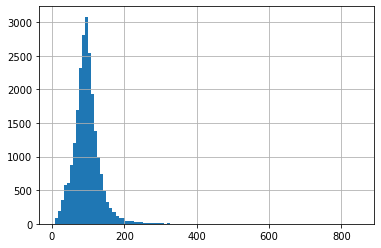

In [73]:
#Посмотрим на распределение данных в новом столбце
data['sqm_price'].hist(bins=100)

В столбце выявлены аномально высокие цены за квадратный метр. Оценим долю выюросов с ценой выше 300000 руб./кв.м. и удалим их.

In [74]:
print('Доля выбросов более 300 тыс. руб. за 1 кв.м. по столбцу sqm_price:', (data.loc[data['sqm_price']>300,'sqm_price'].count())/(data['sqm_price'].count()))

Доля выбросов более 300 тыс. руб. за 1 кв.м. по столбцу sqm_price: 0.0024504535488586044


In [75]:
data = data.drop(data[data['sqm_price'] > 300].index)

<AxesSubplot:>

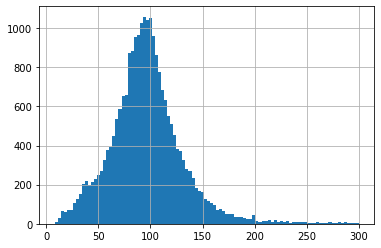

In [76]:
#Посмотрим гистограмму после удаления выбросов
data['sqm_price'].hist(bins=100)

#### День недели, месяц и год публикации объявления


In [77]:
#Приведем столбец с датой публикации объявления в нужный формат
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [78]:
#Добавим столбцы weekday_exposition, month_exposition и year_exposition
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [79]:
#Проверим успешность включения столбцов weekday_exposition, month_exposition и year_exposition
print(data['weekday_exposition'].describe())
print(data['month_exposition'].describe())
print(data['year_exposition'].describe())

count    23204.000000
mean         2.569428
std          1.790775
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64
count    23204.000000
mean         6.400922
std          3.491768
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64
count    23204.000000
mean      2017.373987
std          1.034269
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year_exposition, dtype: float64


#### Тип этажа квартиры

In [80]:
#Настроим категоризацию этажей на значения «первый», «последний», «другой»
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [81]:
#Добавим столбец floor_category
data['floor_category'] = data.apply(floor_category, axis = 1)

In [82]:
#Проверим успешность включения столбцa floor_category
print(data['floor_category'].value_counts())

другой       17016
последний     3219
первый        2887
Name: floor_category, dtype: int64


#### Расстояние до центра города в километрах 

In [83]:
#Переведем значения столбца cityCenters_nearest из м в км, округлим до целых значений и добавим столбец cityCenters_nearest_km
data['cityCenters_nearest_km']= round(data['cityCenters_nearest']/1000)

In [84]:
#Проверим успешность включения столбцa cityCenters_nearest_km
print(data['cityCenters_nearest_km'].describe())

count    17698.000000
mean        14.384563
std          8.583922
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest_km, dtype: float64


### Исследовательский анализ данных

#### Изучение параметров площади - total_area, kitchen_area, living_area

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

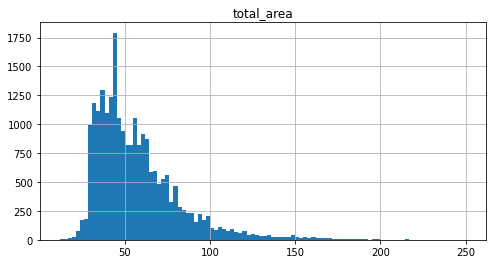

In [85]:
data.hist('total_area', bins=100, figsize=(8,4))

In [86]:
print(data['total_area'].describe())

count    23204.000000
mean        57.344363
std         25.168023
min         12.000000
25%         40.000000
50%         51.200000
75%         68.000000
max        250.000000
Name: total_area, dtype: float64


array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

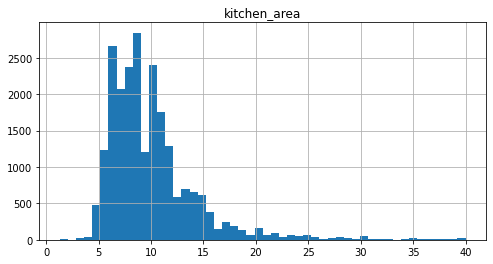

In [87]:
data.hist('kitchen_area', bins=50,figsize=(8,4))

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

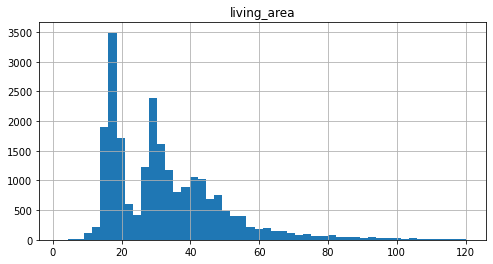

In [88]:
data.hist('living_area', bins=50,figsize=(8,4))

Все параметры площади недвижимости распределены с наклоном влево, т.к. большая часть объявлений на Яндекс.Недвижимость состоит из бюджетных или медиум-сегмента квартир со средней площадью в многоквартирных домах.

In [89]:
#Посмотрим какие площади имеют квартиры согласно числу комнат 
print('Медианные площади недвижимости согласно количеству комнат: \n', data.groupby('rooms')['total_area'].median())

Медианные площади недвижимости согласно количеству комнат: 
 rooms
0     26.025
1     36.500
2     53.000
3     72.200
4     96.000
5    127.650
6    150.000
7    145.200
8    170.600
Name: total_area, dtype: float64


#### Изучение цен на квартиры

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

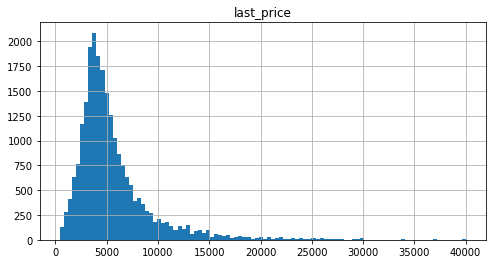

In [90]:
data.hist('last_price', bins=100, figsize=(8,4))

In [91]:
print(data['last_price'].describe())

count    23204.000000
mean      5672.810852
std       4016.154825
min        430.000000
25%       3400.000000
50%       4600.000000
75%       6570.000000
max      40000.000000
Name: last_price, dtype: float64


array([[<AxesSubplot:title={'center':'sqm_price'}>]], dtype=object)

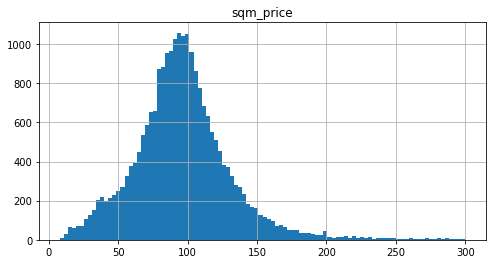

In [92]:
data.hist('sqm_price', bins=100, figsize=(8,4))

In [93]:
print(data['sqm_price'].describe())

count    23204.000000
mean        96.251524
std         34.788104
min          7.962963
25%         76.190476
50%         94.542842
75%        113.230965
max        300.000000
Name: sqm_price, dtype: float64


In [94]:
#Посмотрим какие площади имеют квартиры согласно числу комнат 
print('Медианные цены на 1 кв.м. в населенных пунктах по убыванию: \n', data.groupby('locality_name')['sqm_price'].median().sort_values(ascending=False))

Медианные цены на 1 кв.м. в населенных пунктах по убыванию: 
 locality_name
Санкт-Петербург         104.257806
Кудрово                 100.000000
Зеленогорск             100.000000
Сестрорецк               99.759615
Пушкин                   99.744246
                           ...    
поселок Совхозный        12.629129
деревня Выскатка         12.335481
деревня Вахнова Кара     11.688312
поселок Свирь            11.481481
деревня Старополье       11.000000
Name: sqm_price, Length: 319, dtype: float64


Разброс цен на недвижимость в Санкт-Петерурге и ЛО составляет от 463 тыс. руб. до 40 млн. руб., медиана цен за 1 кв.м. равна 94 тыс.руб.
Наиболее высокие цены наблюдаются в Санкт-Петерурге.

#### Изучение характеристик этажности - этаж квартиры, тип этажа квартиры, общее количество этажей в доме

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

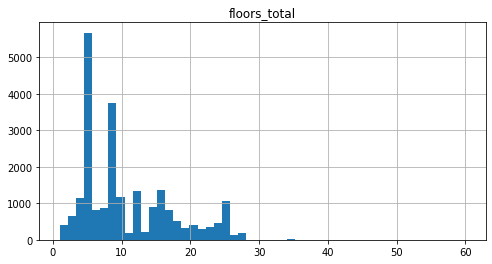

In [95]:
data.hist('floors_total', bins=50, figsize=(8,4))


In [96]:
print(data['floors_total'].describe())

count    23119.000000
mean        10.743544
std          6.618673
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

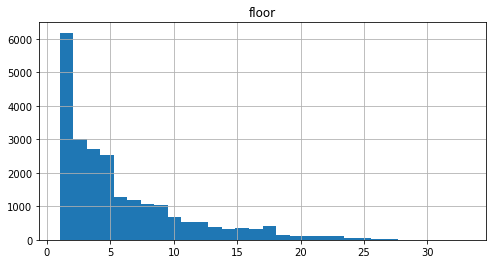

In [97]:
data.hist('floor', bins=30, figsize=(8,4))

In [98]:
data['floor_category'].value_counts()

другой       17016
последний     3219
первый        2887
Name: floor_category, dtype: int64

(-1.117649612035255, 1.100840477014732, -1.1103828308236623, 1.119594016735916)

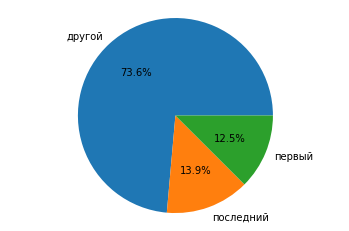

In [99]:
vals = [17016, 3219, 2887]
labels = ['другой', 'последний', 'первый']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis('equal')

Самое высотное здание среди представленных имеет 60 этажей. Наибольшее количество объявлений риходится на недвижимость из 9-этажек. Первые и последние этажи занимают примерно по одинаковой доле - 12.5% и 13.9% соответственнно.

#### Изучение количества комнат

In [100]:
print('Количество объявлений по числу комнат: \n', data.groupby('rooms')['rooms'].count())

Количество объявлений по числу комнат: 
 rooms
0     196
1    8028
2    7879
3    5700
4    1103
5     236
6      47
7      13
8       2
Name: rooms, dtype: int64


Чаще всего на продажу выставляются 1-2 комнатные квартиры.

#### Изучение высоты потолков

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

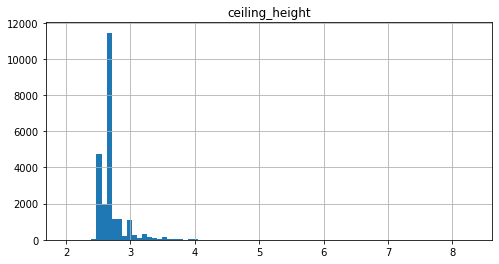

In [101]:
data.hist('ceiling_height', bins=80, figsize=(8,4))

In [102]:
print(data['ceiling_height'].describe())

count    23204.000000
mean         2.689790
std          0.216534
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64


Минимальное значение высоты потолка взяли за 2 м. при отсечении аномалий, т.к. среди объявлений могут быть нежилые здания. Максимальное значение - 8.3 м., т.к.возможны нетипичные виды недвижимости (2-3 уровневые квартиры, коттеджи, таунхаусы, пенхаусы и др.). Медианное значение высоты потолка 2.65 м., что соответствует обычной практике строительства жилья в России.  

#### Изучение параметров расстояния до центра города, до ближайшего аэропорта, до ближайшего парка

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

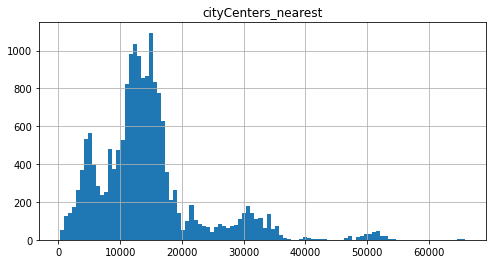

In [103]:
data.hist('cityCenters_nearest', bins=100, figsize=(8,4)) 

In [104]:
print(data['cityCenters_nearest'].describe())

count    17698.000000
mean     14391.234885
std       8576.181754
min        181.000000
25%       9628.000000
50%      13222.000000
75%      16414.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


In [105]:
print(data.groupby('locality_name')['cityCenters_nearest'].median().sort_values(ascending=True))

locality_name
Санкт-Петербург         12363.0
поселок Парголово       19311.0
поселок Мурино          21888.0
поселок Стрельна        23506.0
поселок Шушары          24211.0
                         ...   
село Путилово               NaN
село Рождествено            NaN
село Русско-Высоцкое        NaN
село Старая Ладога          NaN
село Шум                    NaN
Name: cityCenters_nearest, Length: 319, dtype: float64


array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

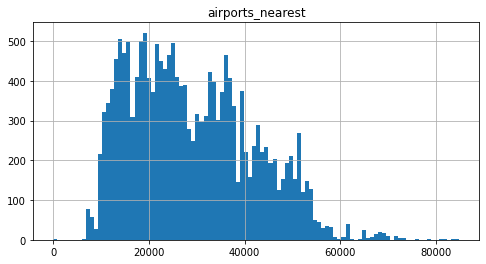

In [106]:
data.hist('airports_nearest', bins=100, figsize=(8,4)) 

In [107]:
print(data.groupby('locality_name')['airports_nearest'].median().sort_values(ascending=True))

locality_name
поселок Александровская    12781.0
Пушкин                     15766.0
поселок Шушары             17425.0
Павловск                   20529.5
поселок Петро-Славянка     20605.0
                            ...   
село Путилово                  NaN
село Рождествено               NaN
село Русско-Высоцкое           NaN
село Старая Ладога             NaN
село Шум                       NaN
Name: airports_nearest, Length: 319, dtype: float64


In [108]:
print(data['airports_nearest'].describe())

count    17678.000000
mean     28836.879681
std      12736.299625
min          0.000000
25%      18459.000000
50%      26828.000000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64


array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

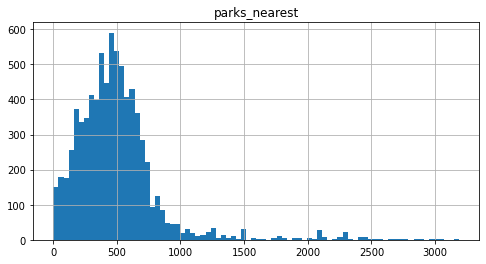

In [109]:
data.hist('parks_nearest', bins=80, figsize=(8,4)) 

In [110]:
print(data.groupby('locality_name')['parks_nearest'].median().sort_values(ascending=True))

locality_name
Зеленогорск             147.5
Кронштадт               293.0
Петергоф                294.0
Павловск                312.0
Сестрорецк              367.0
                        ...  
село Путилово             NaN
село Рождествено          NaN
село Русско-Высоцкое      NaN
село Старая Ладога        NaN
село Шум                  NaN
Name: parks_nearest, Length: 319, dtype: float64


In [111]:
data['parks_nearest'].describe()

count    7747.000000
mean      494.120692
std       342.243090
min         1.000000
25%       290.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Медианное значение расстояния до центра города составляет 13 км., до аэропорта 26 км. Ближайший парк у большинства представленнных объявлений находится на расстоянии 456 м.

#### Изучение параметров даты - день и месяц публикации объявления

In [112]:
data['weekday_exposition'].value_counts()

3    4175
1    4104
4    3928
2    3892
0    3540
5    1894
6    1671
Name: weekday_exposition, dtype: int64

<BarContainer object of 7 artists>

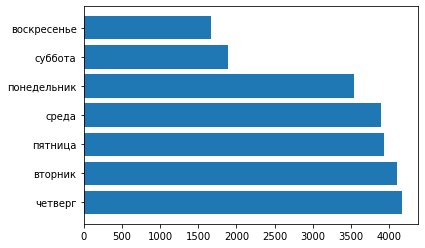

In [113]:
groups = ['четверг', 'вторник', 'пятница', 'среда', 'понедельник', 'суббота', 'воскресенье']
counts = [4175, 4104, 3928, 3892, 3540, 1894, 1671]
plt.barh(groups, counts)

In [114]:
data['month_exposition'].value_counts()

2     2584
3     2540
11    2329
4     2326
10    2087
9     1944
6     1718
8     1705
7     1652
12    1601
1     1466
5     1252
Name: month_exposition, dtype: int64

<BarContainer object of 12 artists>

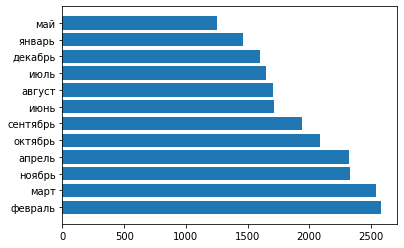

In [115]:
groups = ['февраль', 'март', 'ноябрь', 'апрель', 'октябрь', 'сентябрь', 'июнь', 'август', 'июль', 'декабрь', 'январь', 'май']
counts = [2584, 2540, 2329,2326, 2087, 1944, 1718, 1705, 1652, 1601, 1466, 1252]
plt.barh(groups, counts)

Чаще всего пользователи публикуют объявления по четвергам, реже всего в выходные.
Популярные месяцы для продажи недвижимости - февраль и март. Тройка наиболее непредпочтительных месяцев - самые праздничные декабрь, январь и май. 

#### Как быстро продаются объекты?

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

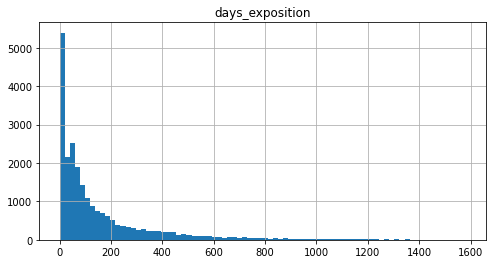

In [116]:
data.hist('days_exposition', bins=80, figsize=(8,4)) 

In [117]:
print(data['days_exposition'].describe())

count    23204.000000
mean       155.294906
std        211.244357
min          0.000000
25%         23.000000
50%         73.000000
75%        197.000000
max       1580.000000
Name: days_exposition, dtype: float64


Минимальное значения срока продажи недвижимости составляет 0 дней (продана или забронирована в день публикации), либо пользователи могли опубликовать объявление и сразу его удалить в тот же день (из-за ошибки, отмены продажи и т.д.).

Максимальное значение составляет 1580 дней (4 года). Возможно платформа Яндекс.Недвижимость продолжает считать дни публикации даже после того, как объявления убрали в архив. Поэтому убирать большие значения как аномалии было бы некорректно.

Например, посчитаем какая доля объявлений "висит" дольше года:

In [118]:
print('Доля объявлений со сроком дольше 1 года', (data.loc[data['days_exposition']>365,'days_exposition'].count())/(data['days_exposition'].count()))

Доля объявлений со сроком дольше 1 года 0.12648681261851405


count    20149.000000
mean       178.840786
std        217.207916
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64


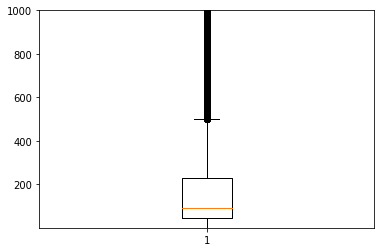

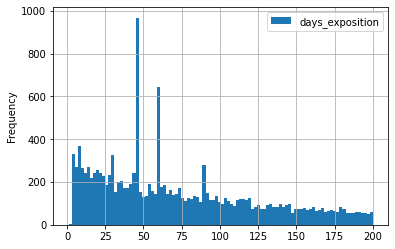

In [119]:
#Построим график "ящик с усами", без учета нулевых значений
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

#Приблизим гистрограммы в масштабе 1-200 дней и 1-200 дней, без учета нулевых значений
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#Среднее значение, медиана и межквартильный размах,  без учета нулевых значений
print(data[data['days_exposition']!=0]['days_exposition'].describe())

Из-за неясности причин такого большого количества объявлений с длинными сроками нельзя сделать однозначный вывод о том как быстро квартиры на Яндекс.Недвижимость находят новых хозяев.

Медианное значение без учета нулевых, но с учетом предположительно архивных объявлений составляет 94 дня.

UPD: Быстрой продажей можно считать те случаи, где срок объявления до 1 месяца (особенно сроки меньше 2-х недель), слишком долгая продажа — более 14 месяцев (428 дней).
Аномально много объявлений снимаются с публикации примерно на 45 и 60 дни со дня публикации. Предположительно, это могут быть массовые публикации от агентств или от мошенников.

Согласно [исследованиям ЦИАН о продажах вторичной недвижимости в России](https://www.kommersant.ru/doc/5295014#:~:text=%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D0%B9%20%D1%81%D1%80%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%81%D0%BF%D0%BE%D0%B7%D0%B8%D1%86%D0%B8%D0%B8%20%D0%BE%D0%B1%D1%8A%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%BE,%D1%83%D0%B7%D0%BA%D0%BE%D0%BC%20%D0%B4%D0%B8%D0%B0%D0%BF%D0%B0%D0%B7%D0%BE%D0%BD%D0%B5%20%D0%BF%D0%BB%D1%8E%D1%81%2D%D0%BC%D0%B8%D0%BD%D1%83%D1%81%20%D0%B4%D0%B5%D0%BD%D1%8C.) _"средний срок экспозиции объявления о продаже квартиры на вторичном рынке в целом по анализируемым локациям составляет 103  дня"_, что примерно и равно нашей медиане. 

#### Что влияет полную полную стоимость квартиры?

Изучим какие из этих факторов больше всего влияют на полную стоимость объекта:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).


##### Параметры площади - общая, жилая, кухня

Корреляция равна: 0.7882541455297568


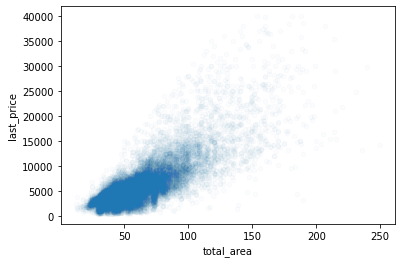

In [120]:
#Посмотрим на взаимосвязь общей площади и полной стоимости
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.02) 
#Посмотрим корреляцию 
print('Корреляция равна:', data['total_area'].corr(data['last_price']))

Корреляция равна: 0.5898108794882589


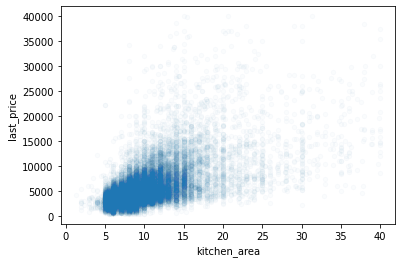

In [121]:
#Посмотрим на взаимосвязь площади кухни и полной стоимости
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.02) 
#Посмотрим корреляцию
print('Корреляция равна:', data['kitchen_area'].corr(data['last_price']))

Корреляция равна: 0.5898108794882589


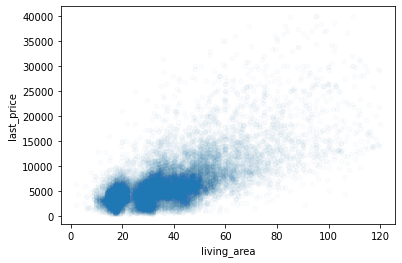

In [122]:
#Посмотрим на взаимосвязь площади жилой зоны и полной стоимости
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.02) 
#Посмотрим корреляцию
print('Корреляция равна:', data['kitchen_area'].corr(data['last_price']))

Все три диаграммы рассеяния имеют восходящий тренд - **квартиры с большой площадью имеют более высокую цену, чем квартиры с меньшей площадью**. Возможно, это наиболее влиятельный параметр, влияющий на стоимость жилья, но далеко не единственный. В соврмененнном мире большую роль играют расположение, инфраструктура, ремонт, а также немаловажны инвестиционная привлекательность локации, рейтинг застройщика, перспективы развития локации и др.

##### Количество комнат

0.493623424096562


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

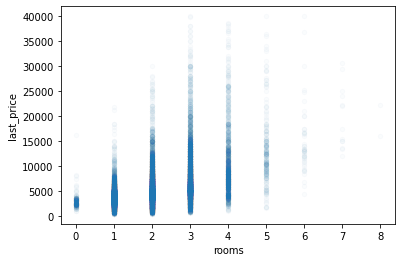

In [123]:
#Посмотрим корреляцию количества комнат и полной стоимости 
print(data['rooms'].corr(data['last_price']))
#Посмотрим на взаимосвязь количества комнат и полной стоимости
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.02) 

Корреляция в 0.49 говорит о наличии связи, однако не слишком сильной. **Увеличение количества комнат сопровождается повышением цены, но так бывает не всегда**. 
Корреляция показывает зависимость между величинами, но не доказывает наличие однозначной причинно-следственной связи. 
Например, 3-комнатная квартира в пригородном поселке может стоить дешевле, чем студия в самом центре Санкт-Петербурга.
Или 2-комнатная квартира в новом современном жилом комплексе и старенький загородный коттедж в непопулярном месте могут иметь одинаковую стоимость. 

##### Этаж, на котором расположена квартира

0.08364422185337683


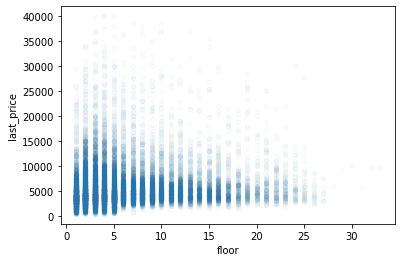

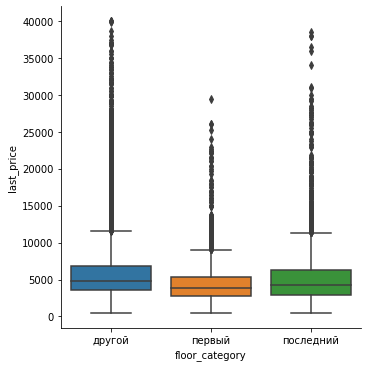

In [124]:
#Посмотрим корреляцию этажа и полной стоимости 
print(data['floor'].corr(data['last_price']))
#Посмотрим на взаимосвязь этажа и полной стоимости
data.plot(x='floor', y='last_price', kind='scatter', alpha=0.02) 
sns.catplot(x='floor_category', y='last_price', kind='box', data=data)

Корреляция близка к нулю, но можно заметить, что **средние этажи имеют более высокую стоимость, чем первые и последние**. 
Вероятно, ценообразование обусловлено тем, что первые этажи могут иметь холодные полы, быть не безопасны без решеток на окнах. Последние этажи имеют риск затопления с крыши дома. 

##### Дата публикации

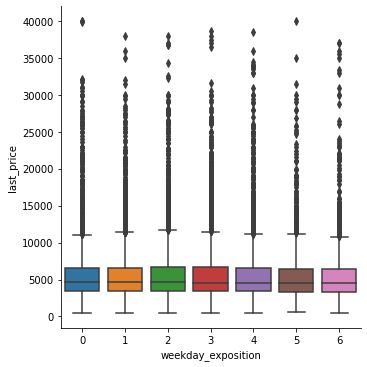

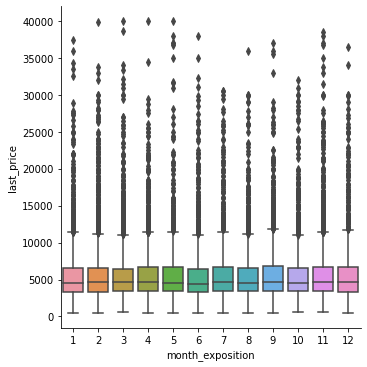

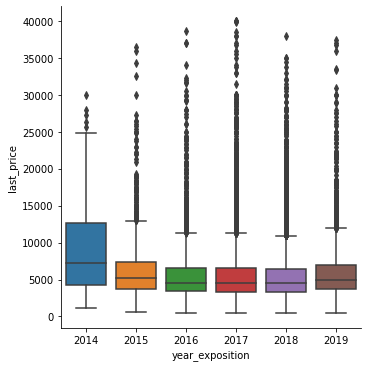

In [125]:
#Проверим влияние даты размещения (день недели, месяц, год) на полную стоимость

for column in ['weekday_exposition', 'month_exposition', 'year_exposition']:
    sns.catplot(x=column, y='last_price', kind='box', data=data)

**День недели и месяц публикации объявления не играют значимой роли на стоимость**. Последний график показал, что в среднем квартиры продавались по более высоким ценам в 2014 году, что можно было бы объяснить валютным кризисом в РФ. 
Но не будем делать поспешных выводов и посмотрим какие площади были у продаваемых квартир в разбивке по годам.

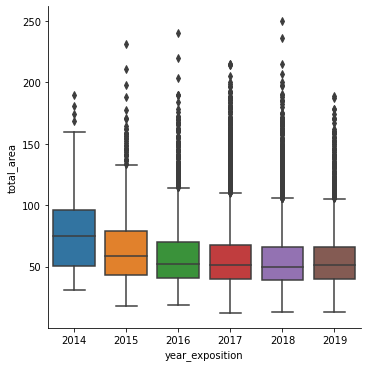

In [126]:
#Проверим влияние года размещения на полную площадь продаваемой недвижимости

sns.catplot(x='year_exposition', y='total_area', kind='box', data=data)

В 2014 году у продаваемый квартир площадь в основном была больше, чем в объявлениях следующих годов. Таким образом, можно объяснить почему цены на объявления 2014 года были выше, чем в другие годы. Однако, сложно предположить почему ситуация выстраивается таким образом. Скорее всего дело в [этапах развития самого проекта Яндекс.Недвижимость](https://ru.wikipedia.org/wiki/%D0%AF%D0%BD%D0%B4%D0%B5%D0%BA%D1%81.%D0%9D%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C):

_"К концу 2014 года месячная аудитория «Недвижимости» приблизилась к 2 миллионам пользователей, и «Яндекс» начал переходить от агрегации к самостоятельному размещению объявлений. В октябре 2014 года на сайте появился поиск по новостройкам Петербурга и Ленинградской области, в декабре площадка открыла конечным пользователям возможность самостоятельно публиковать объявления. <...> В конце сентября 2015 года «Недвижимость» отказалась от агрегации объявлений в московском и петербургском регионах и сосредоточилась на работе с поставщиками объявлений — агентствами недвижимости, агентами и собственниками."_

Возможно в 2014 году весомую долю объявлений составляла недвижимость в современных новостройках, имеющая более широкую площадь, чем вторичное жилье давних годов постройки. 

#### Цена квадратного метра в зависимости от локации

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [127]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'sqm_price', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
#Выведем топ населенных пунктов по количеству объявлений
print(locality_pivot_table.head(10))


                   count        mean
locality_name                       
Санкт-Петербург    15250  110.534462
поселок Мурино       555   85.680200
поселок Шушары       439   78.703191
Всеволожск           397   67.213725
Пушкин               361  102.820302
Колпино              337   75.333117
поселок Парголово    326   90.332168
Гатчина              307   68.746130
деревня Кудрово      299   92.472977
Выборг               237   58.141909


In [128]:
#Самая высокая стоимость в населенном пункте
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15250,110.534462


In [129]:
#Самая низкая стоимость в населенном пункте
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58.141909


Cамая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге - 110 тыс. руб. за кв.м. Самая низкая стоимость в Выборге - 58 тыс. руб. за кв.м.

#### Зависимость стоимости квадратного метра от расстояния до центра города (Санкт-Петербург)

Выделим квартиры в Санкт-Петербурге и проанализируем как стоимость объектов зависит от расстояния до центра города.

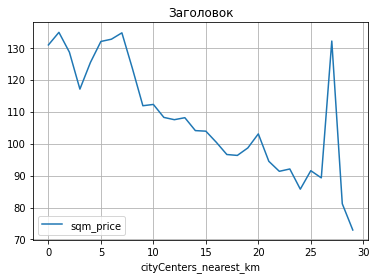

In [130]:
#Заполним пустые значения в столбце
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(-1)
pivot_table_ccnkm = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=-1').pivot_table(index = 'cityCenters_nearest_km', values = 'sqm_price', aggfunc = 'mean')
#Посмотрим на график
pivot_table_ccnkm.plot(grid = True, title = 'Заголовок');
#pivot_table_ccnkm

График цен за 1 кв.м. имеет тенденцию к снижению при увеличении расстояния от центра города. Но в промежутке между 25 км. и 30 км. есть большой скачок цен. Возможно на таком расстоянии от центра находится недвижимость премиум сегмента.

### Общий вывод

**Предобработка данных:**

На входе мы имели архив с данными Яндекс.Недвижимость в Санкт-Петербурге и ЛО за 2014-2019 гг., вводимыми руками пользователей, т.е. с большим количеством пропусков и аномалий.
Для удобства анализа датасет подвергся следующим изменениям:
- По итогу заполнения пустых значений там, где это было возможно, доля пустот уменьшилась с 43.4% до 22.5% (на 20,9 п.п.).
- В результате сокращения аномальных значений датасет стал меньше на 1.8 %.
- Заменой значений удалось избавиться от 44 неявных дубликатов.
- В таблицу добавлены новые столбцы - цена за 1 кв.м., даты публикации (дни недели, месяцы, годы), тип этажа квартиры (первый, последний, другие), расстояние до центра в км.

**Итоги исследования отдельных данных**
- Площадь объектов по количеству комнат:
0-комн. (студии) - 26 кв.м.
1-комн. - 36 кв.м.
2-комн. - 53 кв.м.
3 комн. - 72 кв.м.
4 комн. - 96 кв.м.
- Разброс цен на недвижимость в Санкт-Петерурге и ЛО составляет от 463 тыс. руб. до 40 млн. руб., медиана цен за 1 кв.м. равна 94 тыс.руб.
- Самое высотное здание среди представленных имеет 60 этажей. Наибольшее количество объявлений риходится на недвижимость из 9-этажек.
- Чаще всего на продажу выставляются 1-комнатные (8028 объявлений) и 2-комнатные квартиры (7879 объявлений). Самое редкое явление из "многокомнатных" - 2 объекта с 8 комнатами.
- Медианное значение высоты потолка 2.65 м., что соответствует обычной практике строительства жилья в России.
- Медианное значение расстояния до центра города составляет 13 км., до аэропорта 26 км. Ближайший парк у большинства представленнных объявлений находится на расстоянии 456 м.
- Чаще всего пользователи публикуют объявления по четвергам, реже всего в выходные. Популярные месяцы для продажи недвижимости - февраль и март. Тройка наиболее непредпочтительных месяцев - самые праздничные декабрь, январь и май.

**Скорость продажи объектов**
Остается неясным параметр срока публикации (days_exposition) - означает ли он, что объявление просто удалено или снято с публикации после реальной продажи. И вот почему: 
- Минимальное значения срока продажи недвижимости составляет 0 дней (продана или забронирована в день публикации), либо пользователи могли опубликовать объявление и сразу его удалить в тот же день (из-за ошибки, отмены продажи и т.д.).
- Максимальное значение составляет 1580 дней (4 года). Возможно платформа Яндекс.Недвижимость продолжает считать дни публикации даже после того, как объявления убрали в архив. Поэтому убирать большие значения как аномалии было бы некорректно.
- Доля объявлений со сроком дольше 1 года 12.6%.
- Медианное значение срока публикации составляет 94 дня (без учета нулевых значений, но с учетом предположительно архивных объявлений).
- Быстрой продажей можно считать те случаи, где срок объявления до 1 месяца (особенно сроки меньше 2-х недель), слишком долгая продажа — более 14 месяцев (428 дней). Аномально много объявлений снимаются с публикации примерно на 45 и 60 дни со дня публикации. Предположительно, это могут быть массовые публикации от агентств или от мошенников.

**Влияние параметров на стоимость недвижимости** 
На полную стоимость объектов недвижимости влияют:
- Площадь (общая, кухни, жилой зоны) - квартиры с большой площадью имеют более высокую цену, чем квартиры с меньшей площадью.
- Количество комнат - увеличение числа комнат сопровождается повышением цены, но так бывает не всегда.
- Этаж - средние этажи имеют более высокую стоимость, чем первые и последние.
- День недели и месяц публикации объявления не играют значимой роли на стоимость. В 2014 году цены были выше, что объясняется большей площадью продаваемой недвижимости.
- Cамая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге - 110 тыс. руб. за кв.м. Самая низкая стоимость в Выборге - 58 тыс. руб. за кв.м.
- В Санкт-Петербурге при увеличении расстояния от центра города цены за 1 кв.м. снижаются. Но в промежутке между 25 км. и 30 км. есть большой скачок цен. Возможно на таком расстоянии от центра находится недвижимость премиум сегмента.

**Рекомендации**
1. Для получения более "чистых" данных необходимо введение проверки (ограничения) вводимых пользователями данных:
- Высота потолков (до 10 метров)
- Площадь (площадь кухни и жилой зоны в сумме не должна быть больше общей площади)
2. Выяснить причину появления пропусков в столбцах, связанных с локацией расстояниями. На [странице создания объявления Яндекс.Недвижимость](https://realty.ya.ru/management-new/add/) по состоянию на 15.11.2022 ввод точного адреса обязателен. Адрес сразу находится на карте, платформа сама определяет название населённого пункта и расстояние до центра города, парков, водоемов, аэропорта. Причина пропуска значений скорее всего имеет технический характер (ошибка при вводе или распознавании адреса, при выгрузке данных и т.п.). 
3. Для более качественного исследования было бы хорошо иметь данные о типе дома (блочный, кирпичый, монолитный и др.), ремонте, годе постройки, характеристиках санузла.
4. Прояснить как формируется параметр срока публикации (days_exposition) - означает ли он, что объявление просто удалено или снято с публикации после реальной продажи; перестает ли считать дни, если убрать объявление в архив.
5. Изучить авторов объявлений, которые массово снимаются с публикации примерно на 45 и 60 дни со дня публикации. Предположительно, это могут быть объявления от агентств или от мошенников.
